In [1]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

import tensorflow as tf
from tensorflow.keras.datasets import mnist     # MNIST dataset is included in Keras
from tensorflow.keras.models import Sequential  # Model type to be used

from tensorflow.keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical

In [2]:
class DigitRecognizer():
    def __init__(self):
       self.model = Sequential()
       (self.X_train, self.y_train), (self.X_test, self.y_test) = mnist.load_data()
       self.Y_train = None
       self.Y_test = None

    def loadModel(self, filename):
        self.model = tf.keras.models.load_model(filename)

    def train(self):
        # The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images

        print("X_train shape", self.X_train.shape)
        print("y_train shape", self.y_train.shape)
        print("X_test shape", self.X_test.shape)
        print("y_test shape", self.y_test.shape)



        plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
        self.X_train = self.X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
        self.X_test = self.X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

        self.X_train = self.X_train.astype('float32')   # change integers to 32-bit floating point numbers
        self.X_test = self.X_test.astype('float32')

        self.X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
        self.X_test /= 255

        print("Training matrix shape", self.X_train.shape)
        print("Testing matrix shape", self.X_test.shape)


        nb_classes = 10 # number of unique digits

        self.Y_train = to_categorical(self.y_train, nb_classes)
        self.Y_test = to_categorical(self.y_test, nb_classes)


        self.model = Sequential()
        self.model.add(Dense(512, input_shape=(784,)))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.2))

        self.model.add(Dense(512))
        self.model.add(Activation('relu'))
        self.model.add(Dropout(0.2))

        self.model.add(Dense(10))
        self.model.add(Activation('softmax'))
        self.model.summary()

        self.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        self.model.fit(self.X_train, self.Y_train, batch_size=128, epochs=5, verbose=1)


    def test(self):
        score = self.model.evaluate(self.X_test, self.Y_test)
        print('Test score:', score[0])
        print('Test accuracy:', score[1])



        predicted_classes = self.model.predict_classes(self.X_test)

        correct_indices = np.nonzero(predicted_classes == self.y_test)[0]

        incorrect_indices = np.nonzero(predicted_classes != self.y_test)[0]

        plt.figure()
        for i, correct in enumerate(correct_indices[:9]):
            plt.subplot(3,3,i+1)
            plt.imshow(self.X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
            plt.title("Predicted {}, Class {}".format(predicted_classes[correct], self.y_test[correct]))
            
        plt.tight_layout()
        plt.show()
            
        plt.figure()
        for i, incorrect in enumerate(incorrect_indices[:9]):
            plt.subplot(3,3,i+1)
            plt.imshow(self.X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
            plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], self.y_test[incorrect]))
            
        plt.tight_layout()
        plt.show()

    def Recognize(self, im):
        pass

Recognizer = DigitRecognizer()





2022-07-04 15:06:40.842037: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-04 15:06:40.844601: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
Recognizer.loadModel('Model.h5')


In [4]:
Recognizer.train()


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dr

2022-07-04 15:06:41.391485: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4506 - accuracy: 0.8642
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1051 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0701 - accuracy: 0.9777
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0549 - accuracy: 0.9818
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0443 - accuracy: 0.9864


313/313 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9781
Test score: 0.07043162733316422
Test accuracy: 0.9781000018119812


/Users/lukeguardino/Documents/handwritten-digit-recognition/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


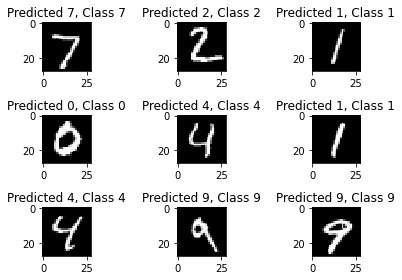

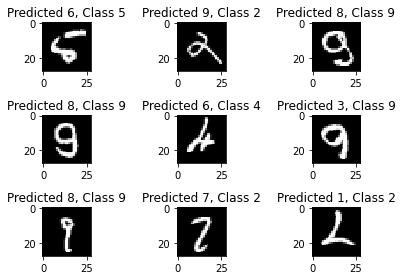

In [5]:
Recognizer.test()


In [6]:
Recognizer.model.save('Model.h5')
